<a href="https://colab.research.google.com/github/aleCastanheira/TCC_MBA/blob/main/03_hyperparams_analisis_for_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

No setup deste notebook, importo as bibliotecas, defino as constantes e a configuração do pandas.

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
from random import sample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import plotly.graph_objects as go
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Range de datas usadas para os rótulos dos gráficos no eixo X
def get_date_strings(start_interval, end_interval):
    timestamps = pd.date_range(start=start_interval, end=end_interval, periods=6, inclusive='both')
    date_strings = [ts.strftime('%Y-%m-%d') for ts in timestamps]
    return date_strings

In [4]:
# CONSTANTES DO SCRIPT
FILEPATH = "/content/drive/MyDrive/TCC"
PROCESSED_METADATA_FILE = "processed_metadata.csv"
PROCESSED_METADATA_OUTLIERS_FILE = "processed_metadata_outliers.csv"
PROCESSED_METADATA_FILEPATH = f"{FILEPATH}/{PROCESSED_METADATA_FILE}"
PROCESSED_METADATA_OUTLIERS_FILEPATH = f"{FILEPATH}/{PROCESSED_METADATA_OUTLIERS_FILE}"

REF_DATE_KEY = "reference_date"
TOTAL_SIZE = "total_size"
TABLE_KEY = "table"

TIMESERIES_COLUMNS = [REF_DATE_KEY, TOTAL_SIZE]

# tabelas usadas para teste
tab_list = [
    'TAB000001', # crescimento constante, sem outliers aparente
    # 'TAB000005', # mantém um padrão constante, não deve ter outliers
    # 'TAB000008', # um pico grande no ano um
]

# intervalos de teste
interval_list = [
    # (
    #     "2021-01-01",
    #     "2021-06-30",
    #     get_date_strings("2021-01-01", "2021-06-30")
    # ), #6 meses
    # (
    #     "2021-01-01",
    #     "2021-12-31",
    #     get_date_strings("2021-01-01", "2021-12-31")
    # ), #1 ano
    (
        "2021-01-01",
        "2022-12-31",
        get_date_strings("2021-01-01", "2022-12-31")
    ), #2 anos
]

# arquivos de teste
metadata_files = [
    # PROCESSED_METADATA_FILEPATH,
    PROCESSED_METADATA_OUTLIERS_FILEPATH
]

# Aqui é aonde customizo as execuções, para avaliar diferentes períodos temporais
# TABLE_FOR_TEST_01 = tab_list[0]
# INTERVAL_FOR_TEST_01 = interval_list[0]
# FILEPATH_FOR_TEST_01 = metadata_files[1]

# date_strings = interval_list[0][2]

# Populo as datas de referência de acordo com o periodo escolhido
# START_DATE_INTERVAL = INTERVAL_FOR_TEST_01[0]
# END_DATE_INTERVAL = INTERVAL_FOR_TEST_01[1]


# Hyperparâmetros

In [5]:
#LSTM params
network_units_list = [
    # 64,
    128,
    # 256,
]

loss_list = [
    # "mae",
    "huber",
    "mse",
]

optimizer_list = [
    "adam",
    # "nadam",
    "rmsprop",
]

dropout_list = [
    0.2,
    0.4,
]

TIME_STEPS = 15
qtd_epochs = 100
batch_size = 15
train_percentage = 0.7

hyperparams_combination_list = []
for network_unit in network_units_list:
    for loss in loss_list:
        for optimizer in optimizer_list:
            for dropout in dropout_list:
                hyperparams_combination_list.append({
                    "network_units": network_unit,
                    "loss": loss,
                    "optimizer": optimizer,
                    "dropout_rate": dropout,
                })

tunning_tests = []
for tab in tab_list:
    for interval in interval_list:
        for filepath in metadata_files:
            tunning_tests.append({
                "table_for_test": tab,
                "interval_for_test": interval,
                "filepath_for_test": filepath,
                "hyperparameters": hyperparams_combination_list,
            })

In [6]:
def get_data(filepath):
    df = pd.read_csv(filepath, parse_dates=False)
    return df

# Resultado final

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.2222 - val_loss: 0.1777
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0292 - val_loss: 0.1006
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0300 - val_loss: 0.3003
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0460 - val_loss: 0.1020
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0320 - val_loss: 0.2090
Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.2494 - val_loss: 0.1832
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0341 - val_loss: 0.2764
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0448 - val_loss: 0.1914
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0382 - val_loss: 0.1723
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0345 - val_loss: 0.1920
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0317 - val_loss: 0.2122
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step -

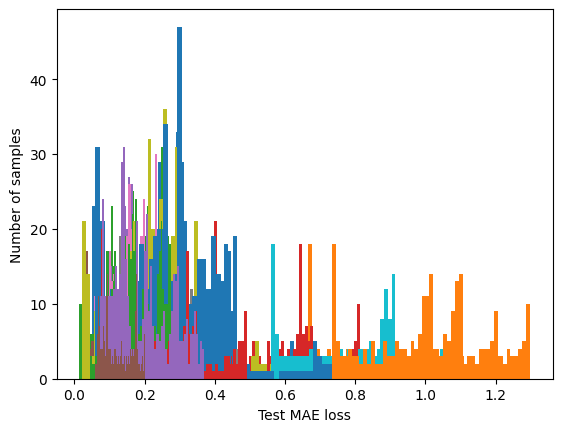

In [7]:
REF_DATE_KEY = "reference_date"
TOTAL_SIZE = "total_size"
outliers_found = []

def add_outliers_found(method, total_outliers, percentage):
        global outliers_found
        item = {
            "method": method,
            "total_outliers": total_outliers,
            "percentage": "{:.2f}%".format(percentage)
        }
        outliers_found.append(item)


# Função para fazer a plotagem do gráfico
def plot_graph(df, outliers_df=None, method=None, date_strings=[]):
    test_choosen = 1
    plt.clf()
    plt.locator_params(axis="x", nbins=6)

    plt.plot(df[REF_DATE_KEY], df[TOTAL_SIZE], label='Série temporal')

    if outliers_df is not None:
        plt.scatter(
            outliers_df[REF_DATE_KEY],
            outliers_df[TOTAL_SIZE],
            color='red',
            label='Anomalias detectadas'
        )

    plt.ylabel("Tamanho dos arquivos (KBs)")
    plt.xticks(date_strings, rotation=10)

    plt.grid(True)
    if method:
        plt.title(f"Anomalias encontradas usando o método '{method}'", fontsize=10)
    else:
        plt.title("Dados presentes em uma tabela de Data Lake", fontsize=14)

    if outliers_df is not None:
        total_outliers = len(outliers_df)
        outlier_percent = (total_outliers / len(df)) * 100
        add_outliers_found(method, total_outliers, outlier_percent)
        img_name = f"{FILEPATH}/imgs/TEST{test_choosen+1}/LSTM/{method}.png".replace(" ", "_")
        plt.savefig(img_name)

    plt.show()

def prepare_data(df, params):
    # Filtrando para trazer apenas uma tabela
    START_DATE_INTERVAL = params["interval_for_test"][0]
    END_DATE_INTERVAL = params["interval_for_test"][1]

    df = df[df[TABLE_KEY] == params["table_for_test"]].copy()
    df = df[(df[REF_DATE_KEY] >= START_DATE_INTERVAL) & (df[REF_DATE_KEY] <= END_DATE_INTERVAL)]
    df[REF_DATE_KEY].min(), df[REF_DATE_KEY].max()
    df[TOTAL_SIZE].astype('Int64')
    df[REF_DATE_KEY] = pd.to_datetime(df[REF_DATE_KEY])

    # Deixando apenas as colunas necessárias para a análise de séries temporais
    df = df[TIMESERIES_COLUMNS].copy()
    df = df.sort_values(by=REF_DATE_KEY)

    return df


def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])

    return np.array(Xs), np.array(ys)


def get_model(X_train, hyperparams):
    model = Sequential()
    model.add(LSTM(hyperparams["network_units"], input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hyperparams["dropout_rate"]))
    model.add(RepeatVector(X_train.shape[1]))
    model.add(LSTM(hyperparams["network_units"], return_sequences=True))
    model.add(Dropout(rate=hyperparams["dropout_rate"]))
    model.add(TimeDistributed(Dense(X_train.shape[2])))
    model.compile(optimizer=hyperparams["optimizer"], loss=hyperparams["loss"])
    return model


def apply_scaler(train, test):
    scaler = StandardScaler()
    scaler = scaler.fit(train[[TOTAL_SIZE]])

    train[TOTAL_SIZE] = scaler.transform(train[[TOTAL_SIZE]])
    test[TOTAL_SIZE] = scaler.transform(test[[TOTAL_SIZE]])
    return train, test


def split_train_test_data(data):
    df = data.copy()
    train_size = int(len(df) * train_percentage)
    test_size = len(df) - train_size
    train, test = df[:train_size], df[train_size:]
    return apply_scaler(train, test)


def execute_from_params(params, hyperparams, plot_graps = False):
    report = {}
    data = get_data(params["filepath_for_test"])
    data = prepare_data(data, params)
    train, test = split_train_test_data(data)

    X_train, y_train = create_sequences(train[[TOTAL_SIZE]], train[TOTAL_SIZE])
    X_test, y_test = create_sequences(test[[TOTAL_SIZE]], test[TOTAL_SIZE])
    # print(f'Training shape: {X_train.shape}')
    # print(f'Testing shape: {X_test.shape}')
    model = get_model(X_train, hyperparams)
    # print(model.summary())

    history = model.fit(
        X_train,
        y_train,
        epochs=qtd_epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[
            keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=3,
                mode='min'
            )
        ],
        shuffle=False
    )

    # print(model.evaluate(X_test, y_test))

    X_train_pred = model.predict(X_train, verbose=0)
    train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)
    plt.hist(train_mae_loss, bins=50)
    plt.xlabel('Train MAE loss')
    plt.ylabel('Number of Samples');

    X_test_pred = model.predict(X_test, verbose=0)
    test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

    plt.hist(test_mae_loss, bins=50)
    plt.xlabel('Test MAE loss')
    plt.ylabel('Number of samples');

    threshold = np.max(train_mae_loss)

    X_test_pred = model.predict(X_test, verbose=0)
    test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

    test_score_df = pd.DataFrame(test[TIME_STEPS:])
    test_score_df['loss'] = test_mae_loss
    test_score_df['threshold'] = threshold
    test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
    test_score_df[TOTAL_SIZE] = test[TIME_STEPS:][TOTAL_SIZE]
    anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
    outliers_total = len(anomalies.index)

    test_score_df = pd.DataFrame(test[TIME_STEPS:])
    test_score_df['loss'] = test_mae_loss
    test_score_df['threshold'] = threshold
    test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
    test_score_df['Close'] = test[TIME_STEPS:][TOTAL_SIZE]

    outlier_percent = (outliers_total / len(data.index)) * 100

    report["hyperparams"] = hyperparams
    report["outliers_total"] = outliers_total
    report["outlier_percent"] = outlier_percent
    report["error_threshold"] = threshold
    report["model"] = model

    method = "LSTM"

    if plot_graps:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=df[REF_DATE_KEY], y=df[TOTAL_SIZE], name='Tamanho total de arquivos'))
        fig.update_layout(showlegend=True, title='Tamanho total de arquivos entre 2020 e 2022')
        fig.show()

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=test_score_df[REF_DATE_KEY], y=test_score_df['loss'], name='Test loss'))
        fig.add_trace(go.Scatter(x=test_score_df[REF_DATE_KEY], y=test_score_df['threshold'], name='Threshold'))
        fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
        fig.show()

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=test_score_df[REF_DATE_KEY], y=test_score_df[TOTAL_SIZE], name='Observations'))
        fig.add_trace(go.Scatter(x=anomalies[REF_DATE_KEY], y=anomalies[TOTAL_SIZE], mode='markers', name='Anomaly'))
        fig.update_layout(showlegend=True, title='Detected anomalies')
        fig.show()
    return report

def execute_tunning(tunning_tests):
    report_tunning_list = []
    for tunning_params in tunning_tests:
        tunning_test = {}
        tunning_test["table_for_test"] = tunning_params["table_for_test"]
        tunning_test["interval_for_test"] = tunning_params["interval_for_test"]
        tunning_test["tests"] = []
        for hyperparams in tunning_params["hyperparameters"]:
            test = {}
            test["network_units"] = hyperparams["network_units"]
            test["dropout_rate"] = hyperparams["dropout_rate"]
            test["optimizer"] = hyperparams["optimizer"]
            test["loss"] = hyperparams["loss"]

            report = execute_from_params(tunning_params, hyperparams)

            # só adiciono os casos que encontraram outliers
            if report["outliers_total"] > 0:
                test["execution"] = report
                tunning_test["tests"].append(test)

        report_tunning_list.append(tunning_test)

    return report_tunning_list

report_tunning_list = execute_tunning(tunning_tests)


In [8]:
report_tunning_list

[{'table_for_test': 'TAB000001',
  'interval_for_test': ('2021-01-01',
   '2022-12-31',
   ['2021-01-01',
    '2021-05-26',
    '2021-10-19',
    '2022-03-14',
    '2022-08-07',
    '2022-12-31']),
  'tests': [{'network_units': 128,
    'dropout_rate': 0.2,
    'optimizer': 'adam',
    'loss': 'huber',
    'execution': {'hyperparams': {'network_units': 128,
      'loss': 'huber',
      'optimizer': 'adam',
      'dropout_rate': 0.2},
     'outliers_total': 188,
     'outlier_percent': 25.753424657534246,
     'error_threshold': 0.6763761586823591,
     'model': <Sequential name=sequential, built=True>}},
   {'network_units': 128,
    'dropout_rate': 0.4,
    'optimizer': 'adam',
    'loss': 'huber',
    'execution': {'hyperparams': {'network_units': 128,
      'loss': 'huber',
      'optimizer': 'adam',
      'dropout_rate': 0.4},
     'outliers_total': 205,
     'outlier_percent': 28.08219178082192,
     'error_threshold': 0.38710748224243824,
     'model': <Sequential name=sequential

In [9]:
def print_tunning_reports(report_list):
    test_number = 0

    for report in report_list:
        test_number = test_number + 1
        table = report["table_for_test"]
        interval = report["interval_for_test"][:-1]
        print(f"TESTE 0{test_number}")
        print("\n")
        print(f"table = {table}")
        print(f"interval = {interval}")
        for test in report["tests"]:
            print("\n")
            print("----------")
            print("\n")
            print(f"network_units: {test['network_units']}")
            print(f"dropout_rate: {test['dropout_rate']}")
            print(f"optimizer: {test['optimizer']}")
            print(f"loss: {test['loss']}")

            outliers_total = test["execution"]['outliers_total']
            outlier_percent = test["execution"]['outlier_percent']
            error_threshold = test["execution"]['error_threshold']
            print(f"outliers_total: {outliers_total}")
            print(f"outlier_percent: {outlier_percent}")
            print(f"error_threshold: {error_threshold}")
            # print(test["execution"]['model'].summary())

        print("-----------------------------------------------")

print_tunning_reports(report_tunning_list)

TESTE 01


table = TAB000001
interval = ('2021-01-01', '2022-12-31')


----------


network_units: 128
dropout_rate: 0.2
optimizer: adam
loss: huber
outliers_total: 188
outlier_percent: 25.753424657534246
error_threshold: 0.6763761586823591


----------


network_units: 128
dropout_rate: 0.4
optimizer: adam
loss: huber
outliers_total: 205
outlier_percent: 28.08219178082192
error_threshold: 0.38710748224243824


----------


network_units: 128
dropout_rate: 0.2
optimizer: rmsprop
loss: huber
outliers_total: 45
outlier_percent: 6.164383561643835
error_threshold: 0.29719763631689644


----------


network_units: 128
dropout_rate: 0.4
optimizer: rmsprop
loss: huber
outliers_total: 43
outlier_percent: 5.89041095890411
error_threshold: 0.375681403663069


----------


network_units: 128
dropout_rate: 0.2
optimizer: adam
loss: mse
outliers_total: 188
outlier_percent: 25.753424657534246
error_threshold: 0.5695087618508466


----------


network_units: 128
dropout_rate: 0.4
optimizer: adam
loss